# Churn rate

Problem domain: predict behavior to retain customers.

Data source: https://www.kaggle.com/blastchar/telco-customer-churn

In [0]:
# Import libraries
import json # access data
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt # plot graph 
import seaborn as sns # plot interactive graph
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
%matplotlib inline


### Access the data

In [0]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'
######################################################################################
# Type Kaggle username and api key
# api_token = {"username":"username","key":"TOKEN_HERE"}


api_token = {"username":" ","key":" "}    
######################################################################################


with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Dataset download
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 52.5MB/s]


In [0]:
# Decompress the files in zip format
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [0]:
# Verify the files available
!ls

sample_data  telco-customer-churn.zip  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [0]:
# read file
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')#, header = 0, index_col = 0) 

### Exploratory Data Analysis (EDA)

In [0]:
# Show the first five lines of dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Show dimensionality (rows, columns)
data.shape

(7043, 21)

7043 data objects with 21 attributes

In [0]:
# List columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
# Concise summary of a dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [0]:
# Missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Churn,0,0.0
OnlineSecurity,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0


Complete dataframe. No missing data.

In [0]:
# Return the number of distinct observations
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [0]:
# Drop customerID 
df = data.iloc[:,1:]

### Target feature

In [0]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

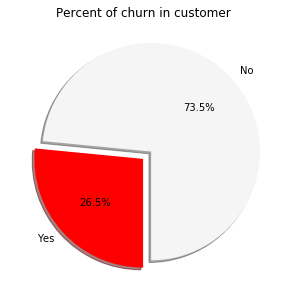

In [0]:
# Data to plot
labels = df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

Churn customer is 26.5%

### Preprocessing

#### Churn

In [0]:
# 'Yes' -> 1 and 'No' -> 0
df['Churn'] = df['Churn'].map(lambda s :1  if s =='Yes' else 0)

#### Gender

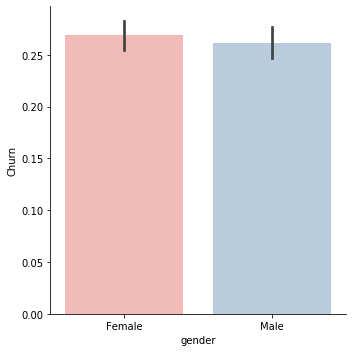

In [0]:
g = sns.catplot(y = "Churn", x = "gender", data = df, kind = "bar", palette = "Pastel1")

In [0]:
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [0]:
# Create columns: gender_Female and gender_Male
df = pd.get_dummies(data=df, columns=['gender'])

In [0]:
# Female: 'Yes' -> 1 and 'No' -> 0
df['gender_Female'].head()

0    1
1    0
2    0
3    0
4    1
Name: gender_Female, dtype: uint8

In [0]:
# Male: 'Yes' -> 1 and 'No' -> 0
df['gender_Male'].head()

0    0
1    1
2    1
3    1
4    0
Name: gender_Male, dtype: uint8

#### SeniorCitizen

In [0]:
# The customer is a senior citizen or not (1, 0)
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [0]:
sc = sns.catplot(y = "Churn", x = "SeniorCitizen", data = df, kind = "bar", palette = "Pastel1")

#### Partner

In [0]:
# The customer has a partner or not (Yes, No)
data['Partner'].value_counts()

In [0]:
# 'Yes' -> 1 and 'No' -> 0
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)

In [0]:
data['Partner'].value_counts()

In [0]:
p = sns.catplot(y="Churn", x="Partner", data=data, kind="bar", palette="muted")

#### Dependents, PhoneService, PaperlessBilling, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

In [0]:
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)

#### Tenure

In [0]:
data['tenure'].head()

In [0]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

In [0]:
# tenure distibution related to Churn
t = sns.kdeplot(data.tenure[(data["Churn"] == 0) ], color="Blue", shade = True)
t = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =t, color="Red", shade= True)
t.set_xlabel("tenure")
t.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
t = t.legend(["Not Churn","Churn"])

In [0]:
# Churn vs tenure
sns.boxplot(x = data['Churn'], y = data['tenure'])

#### MultipleLines

In [0]:
data['MultipleLines'].value_counts()

In [0]:
# To be just binary values, 'No phone service' will be treated as 'No'

data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].value_counts()

#### InternetService

In [0]:
data['InternetService'].unique()

In [0]:
# To create a binary column is necessary: 
# 1) divide the InternetService into 3 columns: internetService; internetDSL; internetFiber_optic
# 2) drop InternetService column

data['internetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['internetFiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['internetDSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)

data.drop(['InternetService'], axis=1, inplace=True)

In [0]:
print(data['internetService'].value_counts())
print(data['internetFiber_optic'].value_counts())
print(data['internetDSL'].value_counts())

#### Contract

In [0]:
data['Contract'].value_counts()

In [0]:
c = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
c.set_ylabel('# of Customers')
c.set_title('# of Customers by Contract Type')

Most of the customers are in the month to month contract. 

In [0]:
# Use pandas function "get_dummies" for this feature
data = pd.get_dummies(data=data, columns=['Contract'])

In [0]:
data[['Contract_Month-to-month','Contract_One year', 'Contract_Two year']].head()

#### PaymentMethod

In [0]:
data['PaymentMethod'].value_counts()

In [0]:
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

In [0]:
data[['PaymentMethod_Bank transfer (automatic)',
      'PaymentMethod_Credit card (automatic)',
      'PaymentMethod_Electronic check',
      'PaymentMethod_Mailed check']].head()

#### MonthlyCharges

In [0]:
# Numeric feature
data['MonthlyCharges'].head()

In [0]:
mc = sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

#### TotalCharges

In [0]:
# Object type
data['TotalCharges'].head()

In [0]:
# 11 missing data in dataset, turn all the column an object type 
len(data[data['TotalCharges'] == " "])

In [0]:
# Drop missing data
data = data[data['TotalCharges'] != " "]

In [0]:
# Change column type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [0]:
# Check column type
data['TotalCharges'].dtypes

In [0]:
tc = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

Most of churn customer has less than 2000 in total charge.
The loyalty customer is around twice as amount as churn customer.

In [0]:
# 'MonthlyCharges' x 'TotalCharges'
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

In [0]:
data.info()

In [0]:
# Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The 3 biggest correlations (non-causalities) with respect to 'Churn' are 'Contract_Month-to-month', 'internetFiber_optic' and 'PaymentMethod_Eletronic check'

### Model

#### Logistic regression

In [0]:
y = data['Churn'].values 
X = data.drop(columns = ['Churn'])

In [0]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped me improve the accuracy from 79.7% to 80.7%. Further, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [0]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [0]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

In [0]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [0]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

. As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions

. Having DSL internet service also reduces the proability of Churn

. Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

Any hypothesis on the above would be really helpful!

#### Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

In [0]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations:

. From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.

. The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

#### Support Vector Machine (SVM)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [0]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

In [0]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))  

Wth SVM I was able to increase the accuracy to upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction.

In [0]:
# alter dataframe data to make this code work: there is no 'gender' column
ax1 = sns.catplot(x=data["gender"], kind="count", hue="Churn", data=data,
                  estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

#### ADA Boost

In [0]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

#### XG Boost

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

MELHORAR...

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, y_train)

In [0]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

My default random forest get around 78% accuracy from cross-validation

In [0]:
%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train, y_train)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))

In [0]:
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train, y_train)

In [0]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(rf, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()
    

My grid-search random forest get around 80% accuracy from cross-validation,
a little bit improve from default parameter

Feature importances

another advantage from rule-based model

In [0]:
Rfclf_fea = pd.DataFrame(rf.feature_importances_)
Rfclf_fea["Feature"] = list(X_train) 
Rfclf_fea.sort_values(by=0, ascending=False).head()

In [0]:
g = sns.barplot(0,"Feature",data = Rfclf_fea.sort_values(by=0, ascending=False)[0:5], palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

Confusion Matrix

also known as an error matrix, it is a specific table layout that allows visualization of the performance of an algorithm

In [0]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_train)

print(confusion_matrix(y_train, y_pred))

!!!!!!!!!!!!!! estudar matriz de confusão e interpretar esse valor

In [0]:
from sklearn.metrics import classification_report

print(classification_report( y_train, y_pred))